We will be following a structured approach using functions since it helps us to do preprocessing easil

Here we will be using small but complicated house price prediction dataset having 79 features and 1 output label.This is a regression problem.

In [236]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support,r2_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge
from sklearn.linear_model import SGDRegressor


The most frequent problem which beginners do is that they don't separate the label and features at the very start of solving the problem, at the end this results in mere changing of the problem statement or some discrepencies of the model building . We will try to understand this aspect later in this article.

Changes done here.
1. Deleting "Id" column since its reduntatnt.
2. Separating label from features

In [237]:
df_train=pd.read_csv("house_price_train.csv")
df_train.drop("Id",axis=1,inplace=True) 

In [238]:

output_col=df_train['SalePrice']
df_train=df_train.drop('SalePrice',axis=1)


In [239]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


### PREPROCESSING

In [240]:
# df_train.columns[df_train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

<AxesSubplot:>

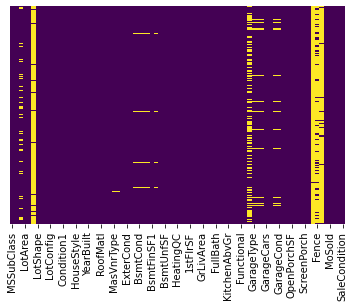

In [241]:
# sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [242]:
# plt.figure(figsize=(30,30))
# sns.heatmap(pd.concat([df_train,output_col],axis=1).loc[:,list(pd.concat([df_train,output_col],axis=1).select_dtypes(include= np.number).columns)].corr(method='spearman'),annot=True,cmap="RdYlGn")
# plt.show()

In [243]:
# fig, axes = plt.subplots(nrows = 12, ncols = 3)    # axes is 2d array (3x3)
# axes = axes.flatten()         # Convert axes to 1d array of length 9
# fig.set_size_inches(30,30)
# cols=list(df_train.select_dtypes(include= np.number).columns)
# for ax, col in zip(axes, cols):
#     print()
#     sns.boxplot(df_train[col], ax = ax)
#     ax.set_title(col)

In [244]:
# fig, axes = plt.subplots(nrows = 12, ncols = 3)    # axes is 2d array (3x3)
# axes = axes.flatten()         # Convert axes to 1d array of length 9
# fig.set_size_inches(20, 20)
# cols=list(df_train.select_dtypes(include= np.number).columns)

# for ax, col in zip(axes, cols):
#     print()
#     sns.distplot(df_train[col], ax = ax)
#     ax.set_title(col)

Here we are deletig columns which have more than 50% NULL values because filling them using any strategy will lead to unbalancing the dataset since more 50% values will be artficially provided by us.

In [245]:
def column_with_most_reduntant_null_values(threshold,df_train:pd.DataFrame):
    null_cols=[]
    for col in df_train.columns:
        if df_train[col].isnull().sum()>=(threshold*len(df_train)):
            null_cols.append(col)
    df_train.drop(null_cols,axis=1,inplace=True)

In [246]:
column_with_most_reduntant_null_values(threshold=0.5,df_train=df_train)

In [247]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


As a result we deleted 5 columns which were having more than 50% NULL values.

In [264]:
continuous_cols=list(df_train.select_dtypes(include= np.number).columns)
categorical_cols=list(df_train.select_dtypes(exclude= np.number).columns)

We can see using the boxplot that there are a high number of outliers in many columns.So,we are filling NULL values using 'median' as a strategy for numerical columns and 'most_frequent' as a strategy for categorical columns. We haven't used "mean" as a strategy to fill NULL values in numerical columns becuase a column might have a huge outier which inturn could increase the value of mean.The strategy of mode could also be used when we have high outliers.

For the categorical columns we have strategies such as to predict the row using unsupervised techniques,using 'most_frequent' strategy and we could just drop the row also but 'most_frequent' is widely regarded as most safe and cheaper in terms of processing so we are using that

In [173]:
def fill_null_values(for_numerical_cols:str,for_categorical_cols:str,df_train):
    for cols in df_train.columns:
        if df_train[cols].dtype=="int64" or df_train[cols].dtype=="float64":
            if for_numerical_cols=="median":
                median_=df_train[cols].median()
                df_train[cols].fillna(median_,inplace=True)
       
            elif for_numerical_cols=="mode":
                mode_=df_train[cols].mode()[0]
                df_train[cols].fillna(mode_,inplace=True)
        elif df_train[cols].dtype=="object":
            if for_categorical_cols=="most_frequent":
                d=list(df_train[cols].value_counts().index) # most frequent
                df_train[cols].fillna(d[0],inplace=True)

In [174]:
fill_null_values(for_numerical_cols="median",for_categorical_cols="most_frequent",df_train=df_train)

In [175]:
# Confirming that outliers are deleted.

for col in df_train.columns:
    if df_train[col].isnull().sum()>0:
        print(col)

Here we are encoding our categorical columns using 'one_hot_encoding' as a strategy. We will be experimenting other strategies later.

In [176]:

def encoding_categorical_cols(df_train:pd.DataFrame,categorical_columns:list,strategy:str):
    df_categorical=pd.DataFrame(df_train.loc[:,categorical_columns])
    if strategy=="labelencoder":
        for col in list(df_categorical.columns):
            cat=[]
            d={}

            cat.append([df_categorical[col].value_counts().index,len(df_categorical[col].value_counts().index)])

            for j in range(int(cat[0][1])):
                d[str(cat[0][0][j])]=j
            df_categorical[col]=df_categorical[col].map(d)
        df_train.drop(categorical_columns,axis=1,inplace=True)
        
        df_train=pd.concat([df_train,df_categorical],axis=1)
        
    if strategy=="onehotencoder":
        one_hot_encoded=pd.get_dummies(df_categorical)
        df_train.drop(categorical_columns,axis=1,inplace=True)
        df_train=pd.concat([df_train,one_hot_encoded],axis=1)
    return df_train

In [177]:
df_train=encoding_categorical_cols(df_train=df_train,categorical_columns=categorical_cols,strategy="onehotencoder")

In [178]:
df_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


Taking features in X and lables in Y

In [179]:
X=df_train
Y=output_col

The below dictionary will save the final accuracies of each model.

In [180]:
final_accuracies={}

In [181]:
def algo_testing(algo:str,test_size:float,X,Y,evaluation_metric:str,random_state,shuffle):
    model=eval(algo)
    evaluation_metric=eval(evaluation_metric)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=random_state,shuffle=shuffle)
   
    model.fit(X_train,Y_train)
   

    predicted=model.predict(X_test)
    
    r2=evaluation_metric(Y_test, predicted)
    print(f"Testing r2_score of {model} is ",r2)
    print(f"Training r2_score of {model} is ", model.score(X_train,Y_train))
    final_accuracies[model]=r2

In [182]:
algo_testing(algo="LinearRegression()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of LinearRegression() is  0.8837249572286773
Training r2_score of LinearRegression() is  0.9331065212610498


In [183]:
algo_testing(algo="RandomForestRegressor()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of RandomForestRegressor() is  0.8926796218880867
Training r2_score of RandomForestRegressor() is  0.9776315614071256


In [184]:
algo_testing(algo="SVR()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of SVR() is  -0.07195321532844856
Training r2_score of SVR() is  -0.058272814924617444


In [185]:
algo_testing(algo="KNeighborsRegressor()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of KNeighborsRegressor() is  0.6379651373506194
Training r2_score of KNeighborsRegressor() is  0.7728845412018455


In [186]:
algo_testing(algo="SGDRegressor()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of SGDRegressor() is  -1.6933056314675848e+24
Training r2_score of SGDRegressor() is  -9.748462211946943e+23


In [187]:
algo_testing(algo="DecisionTreeRegressor()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of DecisionTreeRegressor() is  0.6532424673146726
Training r2_score of DecisionTreeRegressor() is  1.0


In [188]:
algo_testing(algo="ElasticNet()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of ElasticNet() is  0.7969876904750149
Training r2_score of ElasticNet() is  0.8335859460206119


C:\Users\mritu\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.459e+11, tolerance: 6.964e+08
  model = cd_fast.enet_coordinate_descent(


In [189]:
algo_testing(algo="Lasso()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of Lasso() is  0.8942062104837788
Training r2_score of Lasso() is  0.9326884154510653


C:\Users\mritu\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.557e+11, tolerance: 7.504e+08
  model = cd_fast.enet_coordinate_descent(


In [190]:
algo_testing(algo="Ridge()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of Ridge() is  0.8919555491956627
Training r2_score of Ridge() is  0.9190908597292329


In [191]:
final_accuracies

{LinearRegression(): 0.8837249572286773,
 RandomForestRegressor(): 0.8926796218880867,
 SVR(): -0.07195321532844856,
 KNeighborsRegressor(): 0.6379651373506194,
 SGDRegressor(): -1.6933056314675848e+24,
 DecisionTreeRegressor(): 0.6532424673146726,
 ElasticNet(): 0.7969876904750149,
 Lasso(): 0.8942062104837788,
 Ridge(): 0.8919555491956627}